In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymatgen==2021.3.5

     |████████████████████████████████| 3.0 MB 3.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 109 kB 44.2 MB/s 
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 292 kB 47.1 MB/s 
     |████████████████████████████████| 98 kB 6.7 MB/s 
     |████████████████████████████████| 546 kB 37.0 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2021.3.5-cp37-cp37m-linux_x86_64.whl size=3777780 sha256=de9ce052fa7c1def80b9bdf214cfb770a86017b7c7d6fa11c192218ebdbc3022
  Stored in directory: /root/.cache/pip/wheels/92/3c/cc/8a969332b9691ba8f1dff8ad85111c0428571e4aee7b043d3f
Successfully built pymatgen
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully u

In [ ]:
!pip install matminer==0.6.5

     |████████████████████████████████| 5.8 MB 4.2 MB/s 
     |████████████████████████████████| 209 kB 45.1 MB/s 
     |████████████████████████████████| 829 kB 45.1 MB/s 
  Created wheel for matminer: filename=matminer-0.6.5-py3-none-any.whl size=1189794 sha256=9a1d7cdc9463d953c9cfedfe6b9e6e731b398f7f64b2742fa360cb62673dabcf
  Stored in directory: /root/.cache/pip/wheels/80/af/92/50a39a27f187d8c8f65bc49eeae74d300861503e78323a800f
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=e373b9bb737824d76b142a79b63f6ec9b84d18f4e9ebc858e8ee0b3c57321bc9
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built matminer future
  Attempting uninstall: future
    Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
import math
import pandas as pd
import numpy as np
import pickle as pkl

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
from scipy import stats

In [ ]:
data0 = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/2021-09-22_mp-cubic_dataset.csv")
data0.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,structure,cif,crossings_+-1eV,crossings_+-2eV
0,mp-1018647,YbNiH3,221,Pm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_YbNiH3\n_symm...,0.0,2.0
1,mp-10601,Y3GaC,221,Pm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Y3GaC\n_symme...,27.0,45.0
2,mp-1076732,KCrO3,221,Pm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_KCrO3\n_symme...,16.0,19.0
3,mp-1094118,Mn3InC,221,Pm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Mn3InC\n_symm...,49.0,55.0
4,mp-1111229,K2NaNdCl6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaNdCl6\n_s...,NaN,NaN


In [ ]:
len(data0)

20829

In [ ]:
#housing[housing['population']>500]
#data = data0[data0['spacegroup']==216]
data =  data0[(data0['spacegroup']==216) | (data0['spacegroup']==225)]
data.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,structure,cif,crossings_+-1eV,crossings_+-2eV
4,mp-1111229,K2NaNdCl6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaNdCl6\n_s...,NaN,NaN
5,mp-1111239,K2NaBiCl6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaBiCl6\n_s...,NaN,NaN
7,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaTiF6\n_sy...,0.0,4.0
8,mp-1112099,K2CeAgCl6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2CeAgCl6\n_s...,NaN,NaN
9,mp-1112164,K2ErCuCl6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2ErCuCl6\n_s...,NaN,NaN


In [ ]:
df0 = data

In [ ]:
len(df0)

12300

In [ ]:
list(df0)

['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'structure',
 'cif',
 'crossings_+-1eV',
 'crossings_+-2eV']

In [ ]:
df0['crossings_+-1eV']

4          NaN
5          NaN
7          0.0
8          NaN
9          NaN
         ...  
20820     40.0
20821     46.0
20822      6.0
20823    128.0
20824      9.0
Name: crossings_+-1eV, Length: 12300, dtype: float64

In [ ]:
df0 = df0.dropna()
df0['crossings_+-1eV']

7          0.0
16         0.0
18         8.0
19        20.0
20         2.0
         ...  
20820     40.0
20821     46.0
20822      6.0
20823    128.0
20824      9.0
Name: crossings_+-1eV, Length: 7322, dtype: float64

In [ ]:
len(df0)

7322

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


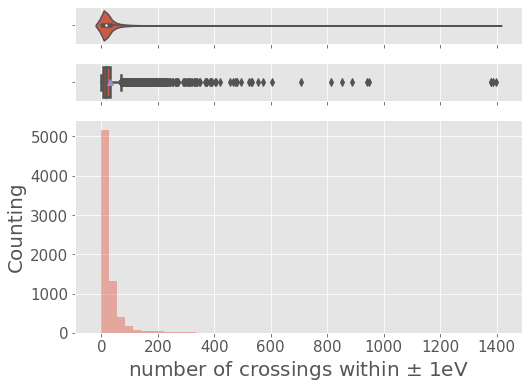

In [ ]:
f, (ax_violin, ax_box, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.15, .15, .85)}, figsize=(8, 6))

sns.violinplot(df0['crossings_+-1eV'], ax=ax_violin)
sns.boxplot(df0['crossings_+-1eV'], linewidth=2.5, showmeans=True, ax=ax_box)
sns.distplot(df0['crossings_+-1eV'], rug=False, kde=False, ax=ax_hist)

ax_box.set(xlabel='')
ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
ax_hist.set_ylabel('Counting', fontsize = 20)

ax_hist.xaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=15, rotation=0);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/li

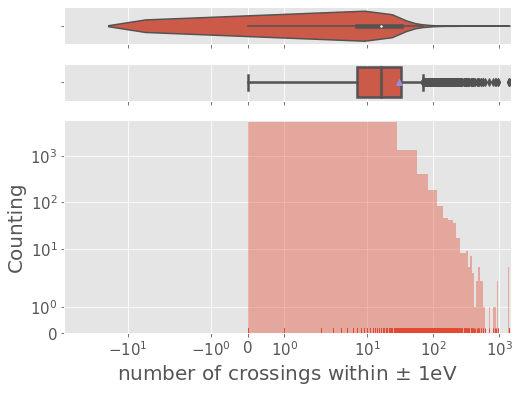

In [ ]:
f, (ax_violin, ax_box, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.15, .15, .85)}, figsize=(8, 6))

sns.violinplot(df0['crossings_+-1eV'], ax=ax_violin)
sns.boxplot(df0['crossings_+-1eV'], linewidth=2.5, showmeans=True, ax=ax_box)
sns.distplot(df0['crossings_+-1eV'], rug=True, kde=False, ax=ax_hist)

ax_box.set(xlabel='')
ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
ax_hist.set_ylabel('Counting', fontsize = 20)

ax_hist.xaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.set_xscale("symlog")
ax_hist.set_yscale("symlog");

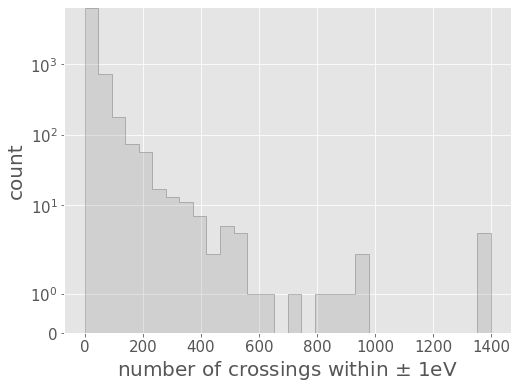

In [ ]:
fig = plt.figure(figsize =(8, 6))
ax=sns.histplot(df0['crossings_+-1eV'], 
            color='grey', 
            bins=30, 
            label='whole data', 
            element="step", 
            stat="count",
            alpha=0.2
            )

plt.ylabel('count', fontsize = 20)
plt.yscale('symlog')
plt.xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)

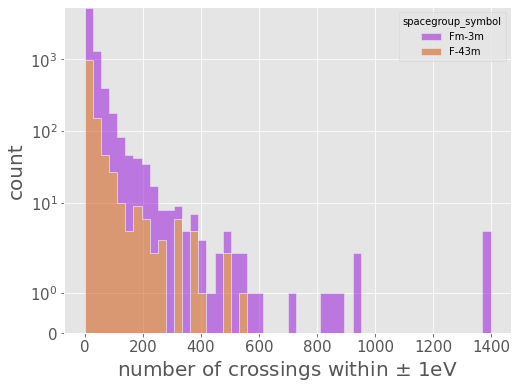

In [ ]:
fig = plt.figure(figsize =(8, 6))

sns.histplot(data=df0, 
            x=df0['crossings_+-1eV'], 
            bins=50, 
            hue="spacegroup_symbol", 
            element="step", 
            stat="count", 
            multiple="stack", 
            alpha=0.5, 
            palette='gnuplot', 
            legend=True
            )

#plt.legend(ncol=2)
plt.ylabel('count', fontsize = 20)
plt.yscale('symlog')
plt.xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15);

'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm...

# Removing Outliers

## Z-score

In [ ]:
z = np.abs(stats.zscore(df0['crossings_+-1eV']))
print(z)

7        0.504755
16       0.504755
18       0.369850
19       0.167492
20       0.471029
           ...   
20820    0.169772
20821    0.270951
20822    0.403576
20823    1.653731
20824    0.352987
Name: crossings_+-1eV, Length: 7322, dtype: float64


In [ ]:
threshold = 2.0
mask = z <= threshold
mask

7        True
16       True
18       True
19       True
20       True
         ... 
20820    True
20821    True
20822    True
20823    True
20824    True
Name: crossings_+-1eV, Length: 7322, dtype: bool

In [ ]:
df0 = df0[mask]
df0

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,structure,cif,crossings_+-1eV,crossings_+-2eV
7,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaTiF6\n_sy...,0.0,4.0
16,mp-1114332,Na3PdF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Na3PdF6\n_sym...,0.0,4.0
18,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Ca2PtAu\n_sym...,8.0,18.0
19,mp-1184082,Er2ZnHg,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Er2ZnHg\n_sym...,20.0,29.0
20,mp-1184870,InAgAu2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_InAgAu2\n_sym...,2.0,3.0
...,...,...,...,...,...,...,...,...,...
20820,mp-980201,TmHfIr2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_TmHfIr2\n_sym...,40.0,56.0
20821,mp-980649,TiNbRu2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_TiNbRu2\n_sym...,46.0,72.0
20822,mp-988940,AlAs,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_AlAs\n_symmet...,6.0,6.0
20823,mp-989526,Cs2KTlF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Cs2KTlF6\n_sy...,128.0,154.0


In [ ]:
len(df0)

7133

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/li

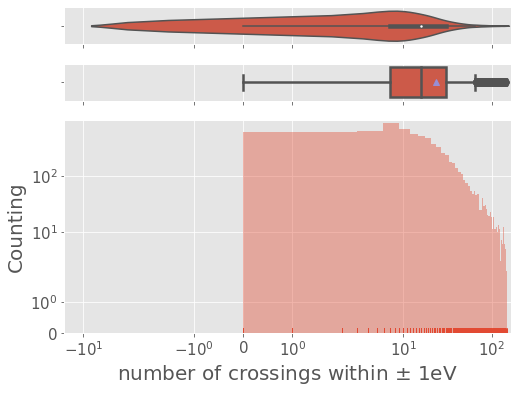

In [ ]:
f, (ax_violin, ax_box, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.15, .15, .85)}, figsize=(8, 6))

sns.violinplot(df0['crossings_+-1eV'], ax=ax_violin)
sns.boxplot(df0['crossings_+-1eV'], linewidth=2.5, showmeans=True, ax=ax_box)
sns.distplot(df0['crossings_+-1eV'], rug=True, kde=False, ax=ax_hist)

ax_box.set(xlabel='')
ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
ax_hist.set_ylabel('Counting', fontsize = 20)

ax_hist.xaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.set_xscale("symlog")
ax_hist.set_yscale("symlog");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


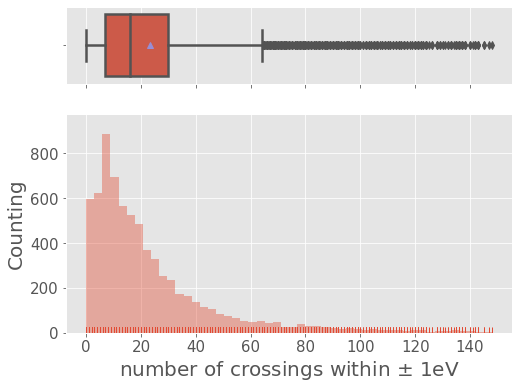

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)}, figsize=(8, 6))

#sns.violinplot(df0['crossings_+-1eV'], ax=ax_violin)
sns.boxplot(df0['crossings_+-1eV'], linewidth=2.5, showmeans=True, ax=ax_box)
sns.distplot(df0['crossings_+-1eV'], rug=True, kde=False, ax=ax_hist)

ax_box.set(xlabel='')
ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
ax_hist.set_ylabel('Counting', fontsize = 20)

ax_hist.xaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=15, rotation=0)
ax_hist.set_xscale("linear")
ax_hist.set_yscale("linear");

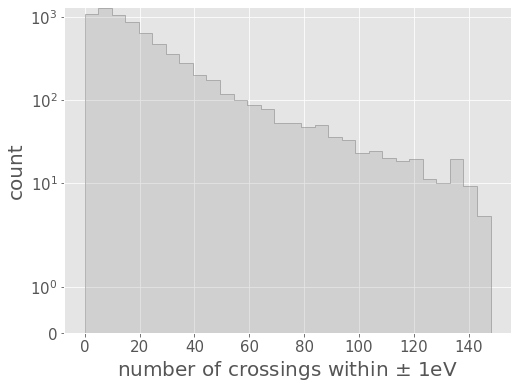

In [ ]:
fig = plt.figure(figsize =(8, 6))
ax=sns.histplot(df0['crossings_+-1eV'], 
            color='grey', 
            bins=30, 
            label='whole data', 
            element="step", 
            stat="count",
            alpha=0.2
            )

plt.ylabel('count', fontsize = 20)
plt.yscale('symlog')
plt.xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)

##  InterQuartile Range (IQR)

In [ ]:
df1 = data

In [ ]:
len(df1)

12300

In [ ]:
df1 = df1.dropna()

In [ ]:
len(df1)

7322

In [ ]:
Q1 = df1['crossings_+-1eV'].quantile(0.25)

In [ ]:
Q3 = df1['crossings_+-1eV'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1
IQR

25.0

In [ ]:
print(IQR)

25.0


In [ ]:
cut_off = IQR * 1.5

In [ ]:
lower, upper = Q1 - cut_off, Q3 + cut_off

In [ ]:
#mask1 = (df1['crossings_+-1eV'] >= lower) | (df1['crossings_+-1eV'] <= upper)
#mask1

In [ ]:
#len(mask1.values)

In [ ]:
#list(mask1)

In [ ]:
outliers = [x for x in df1['crossings_+-1eV'] if x < lower or x > upper]

In [ ]:
len(outliers)

616

In [ ]:
mask1 = (df1['crossings_+-1eV'] < (Q1 - 1.5*IQR)) | (df1['crossings_+-1eV'] > (Q3 + 1.5*IQR))
print(mask1)

7        False
16       False
18       False
19       False
20       False
         ...  
20820    False
20821    False
20822    False
20823     True
20824    False
Name: crossings_+-1eV, Length: 7322, dtype: bool


In [ ]:
indeces = df1[(df1['crossings_+-1eV'] < (Q1 - 1.5*IQR))|(df1['crossings_+-1eV'] > (Q3 + 1.5*IQR))].index
indeces

Int64Index([   57,    59,    69,   131,   142,   160,   175,   206,   318,
              359,
            ...
            20592, 20595, 20627, 20687, 20735, 20736, 20768, 20774, 20813,
            20823],
           dtype='int64', length=616)

In [ ]:
df1.drop(indeces, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,structure,cif,crossings_+-1eV,crossings_+-2eV
7,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_K2NaTiF6\n_sy...,0.0,4.0
16,mp-1114332,Na3PdF6,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Na3PdF6\n_sym...,0.0,4.0
18,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Ca2PtAu\n_sym...,8.0,18.0
19,mp-1184082,Er2ZnHg,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_Er2ZnHg\n_sym...,20.0,29.0
20,mp-1184870,InAgAu2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_InAgAu2\n_sym...,2.0,3.0
...,...,...,...,...,...,...,...,...,...
20819,mp-979965,YbSmPt2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_YbSmPt2\n_sym...,18.0,51.0
20820,mp-980201,TmHfIr2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_TmHfIr2\n_sym...,40.0,56.0
20821,mp-980649,TiNbRu2,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_TiNbRu2\n_sym...,46.0,72.0
20822,mp-988940,AlAs,225,Fm-3m,cubic,"{""@module"": ""pymatgen.core.structure"", ""@class...",# generated using pymatgen\ndata_AlAs\n_symmet...,6.0,6.0


In [ ]:
#df1 = df1[mask1.values]
#df1.head(5)

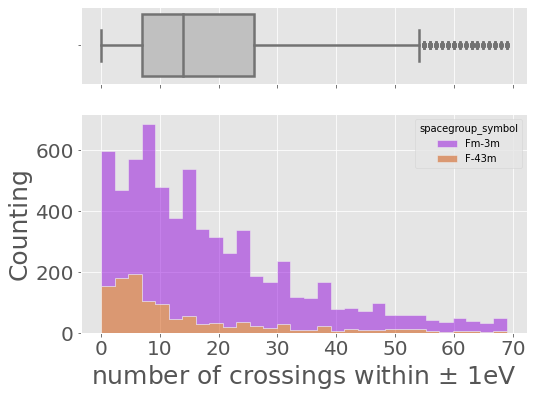

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)}, figsize=(8, 6))

#sns.violinplot(df0['crossings_+-1eV'], ax=ax_violin)
sns.boxplot(x=df1['crossings_+-1eV'], 
            #hue="spacegroup_symbol", 
            color='silver', 
            linewidth=2.5, 
            #showmeans=True, 
            ax=ax_box)
#sns.distplot(df1['crossings_+-1eV'], rug=True, kde=False, ax=ax_hist)

sns.histplot(data=df1, 
            x=df1['crossings_+-1eV'], 
            bins=30, 
            hue="spacegroup_symbol", 
            element="step", 
            stat="count", 
            multiple="stack", 
            alpha=0.5, 
            palette='gnuplot', 
            legend=True, 
            ax=ax_hist
            )


ax_box.set(xlabel='')
#ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 25)
ax_hist.set_ylabel('Counting', fontsize = 25)

ax_hist.xaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.set_xscale("linear")
ax_hist.set_yscale("linear")
#ax_hist.legend(loc='upper right')
plt.savefig(f"/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/dataset_dist_sp225-216.png", bbox_inches='tight', dpi=400);

In [ ]:
df1.to_csv(r'/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/df_sp216_225.csv', index=False)

In [ ]:
df1.to_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/df_sp216_225.pkl')